In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
catalog = pd.read_csv("TransientVariables.csv")

## Preliminary Data Analysis

In [4]:
catalog.columns

Index(['index', 'ztf_id', 'ingested', 'zvm_id', 'variable', 'binary star',
       'RS CVn', 'periodic', 'eclipsing', 'detached eclipsing MS-MS', 'EW',
       'W Uma', 'sawtooth', 'pulsator', 'RR Lyrae', 'RR Lyrae c',
       'non-variable', 'RR Lyrae ab', 'bogus', 'galaxy', 'multi periodic',
       'RR Lyrae Blazhko', 'blend', 'EB', 'Beta Lyr', 'irregular', 'flaring',
       'RR Lyrae d', 'EA', 'bright star', 'wrong period', 'double period',
       'long timescale', 'LPV', 'SRV', 'Cepheid type-II', 'Cepheid',
       'high amplitude Delta Scu', 'BL Her', 'W Virginis', 'sinusoidal',
       'RV Tau', 'half period', 'Mira', 'ccd artifact', 'Delta Scu', 'F',
       'dipping', 'YSO', 'ra', 'dec', 'period', 'significance', 'pdot', 'n',
       'median', 'wmean', 'chi2red', 'roms', 'wstd', 'norm_peak_to_peak_amp',
       'norm_excess_var', 'median_abs_dev', 'iqr', 'f60', 'f70', 'f80', 'f90',
       'skew', 'smallkurt', 'inv_vonneumannratio', 'welch_i', 'stetson_j',
       'stetson_k', 'ad', 'sw'

### Checking the type of content in all columns of the dataframe

All columns are either int64 or float64 except the zvm_id and dmdt columns

### Checking for null values

In [5]:
catalog.isnull().sum().sum() # the catalog is complete and has no null values!

0

In [6]:
ontological_class = catalog[['pulsator','Delta Scu','Cepheid','RR Lyrae','LPV','Mira','SRV','binary star',
                            'W Uma','Beta Lyr','RS CVn','YSO']].copy()
# making a smaller dataframe containing only ontological classes

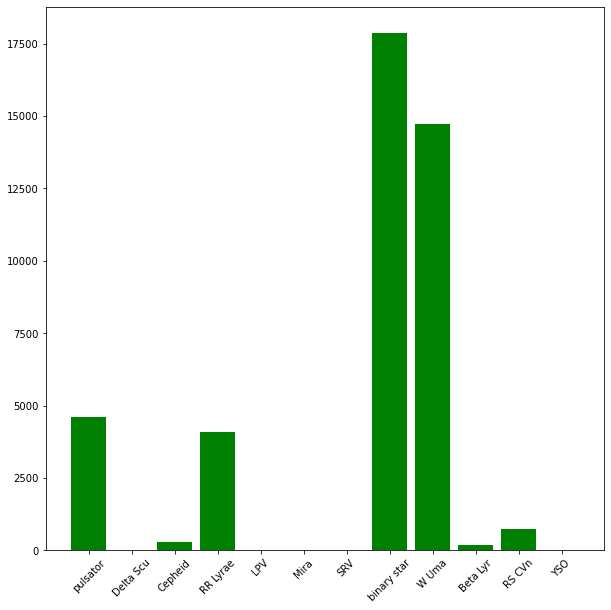

In [7]:
# plotting to see what the distribution of data is.
fig, ax = plt.subplots(figsize=(10, 10))
for cols in ontological_class:
    plt.bar(cols, ontological_class[cols].sum(),color = 'green')

plt.xticks(rotation=45)
plt.show()


In [8]:
for col in catalog.columns:
    #if catalog[col].dtype == 'O':
        print(f'Column: ' + col)
        print(catalog[col].value_counts())
        print('\n')

Column: index
0        1
25585    1
25587    1
25588    1
25589    1
        ..
12795    1
12796    1
12797    1
12798    1
38385    1
Name: index, Length: 38386, dtype: int64


Column: ztf_id
10675032003401    1
10683243018195    1
10683241008986    1
10682192020002    1
10682193022557    1
                 ..
10427482004377    1
10427512002143    1
10427351004476    1
10427352006566    1
10384032147377    1
Name: ztf_id, Length: 38386, dtype: int64


Column: ingested
1    38386
Name: ingested, dtype: int64


Column: zvm_id
ZTFk24itocl    11
ZTFzput9qcm     9
ZTFu2z2v0qg     9
ZTF4toj703j     8
ZTFfjzu26vt     8
               ..
ZTFq8woynxr     1
ZTFglc9va2d     1
ZTFs1fbpcmg     1
ZTFhavmgxzi     1
ZTF7ddrkojv     1
Name: zvm_id, Length: 16515, dtype: int64


Column: variable
1.000    27484
0.000    10662
0.250      126
0.750       62
0.500       47
0.875        3
0.625        2
Name: variable, dtype: int64


Column: binary star
0.0    20511
1.0    17875
Name: binary star, dtype: in

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006076249243863046, 0.01215

## Classification of Pulsators:

The dataset has 4 sub-classification of pulsators: Delta Scu, Cepheid, RR Lyrae, and LPV. I will be using the RFE method to classify these 4 types of pulsators.

As one can see, the datasets are not equally distributed and there's a huge difference. This can skew our model and an instance of that is shown below.

### Imbalanced dataset modeling

In [9]:
delta_s = catalog[catalog["Delta Scu"] != 0]

delta_s["Class"] = delta_s["Delta Scu"].map({1:1})

cp = catalog[catalog["Cepheid"] != 0]

cp["Class"] = cp["Cepheid"].map({1:2})

rr =catalog[catalog["RR Lyrae"] != 0]

rr["Class"] = rr["RR Lyrae"].map({1:3})

lvp = catalog[catalog["LPV"] != 0]

lvp["Class"]= lvp["LPV"].map({1:4})

df_pul = delta_s.append(cp, ignore_index = True)
df_pul = df_pul.append(rr, ignore_index = True)
df_pul = df_pul.append(lvp, ignore_index = True)
df_pul = df_pul.append(catalog[catalog["pulsator"] != 1], ignore_index = True)

In [10]:
catalog_refined = df_pul.dropna()

In [23]:
pulsators = catalog_refined['Class']
catalog_refined.drop('Class',axis=1,inplace=True)

In [15]:
catalog_refined.drop(catalog_refined.iloc[:,0:51],axis=1, inplace=True)

In [17]:
catalog_refined.drop('dmdt',axis=1,inplace=True)

In [24]:
# importing required modules
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

RandForest = RandomForestRegressor() # this is an estimator. You can use a different one.

rfe = RFE(estimator=RandForest, step=1, verbose=1, n_features_to_select=10)

# step: # of unnecessary features to eliminate at a time. You can change this to any integer value
# verbose: tell me what is happening (1) or don't tell me (0)
# n_features_to_select: the number of features I want. This is totally subjective and can change.

In [25]:
# trying the RFE analysis for pulsators

rfe.fit(catalog_refined,pulsators)
rfe.transform(catalog_refined)

print("Optimal number of features: {}".format(rfe.n_features_))



Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 fe

In [26]:
f = rfe.get_support(1) # show the optimuzed columns' indices
optimized_features = catalog_refined[catalog_refined.columns[f]] # creating an optimized dataframe.
optimized_features

,period,significance,n,median_abs_dev,iqr,f1_power,f1_amp,f1_relamp1,f1_relphi1,mean_ztf_alert_braai
0,0.070116,352.675573,66.0,0.1085,0.2955,0.941979,0.268464,0.393420,0.352674,0.999331
1,0.100453,406.517085,66.0,0.1420,0.3015,0.981534,0.244618,0.316394,0.342534,0.966907
2,0.079355,277.966847,109.0,0.0890,0.1940,0.949364,0.155842,0.410862,0.350221,0.998352
3,0.079355,152.293694,93.0,0.1230,0.2760,0.887943,0.239040,0.429247,0.341037,0.998352
4,4.729865,222.805445,65.0,0.2670,0.5500,0.993185,0.421660,0.485856,0.438121,0.861822
...,...,...,...,...,...,...,...,...,...,...
4410,461.963280,58.627076,110.0,0.0455,0.0875,0.848089,5.402807,0.711152,0.284896,0.662999
4411,3355.825380,12.627150,81.0,0.1200,0.2380,0.383912,5782.618641,0.141673,0.504254,0.662999
4412,279.652295,207.535928,84.0,0.7640,1.2585,0.974570,6.177888,0.731187,0.725246,0.963779
4413,395.968560,286.959240,104.0,0.5665,1.0550,0.984580,43.784418,0.747465,0.750795,0.963779


In [28]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(optimized_features,pulsators,test_size=0.2,random_state=2,stratify=pulsators)


In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9920724801812004

In [30]:
model.score(X_train,y_train) # to check if my model is overfitting.

1.0

In [38]:
y_pred = model.predict(X_test) #making predictions with the model

labels = ['Delta Scu','Cepheids','RR Lyrae','LPV'] # generating labels

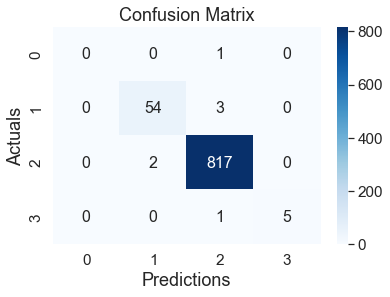

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

labels = np.unique(y_test)

conf_matrix = confusion_matrix(y_test, y_pred)

sn.set(font_scale=1.4) # for label size

sn.heatmap(conf_matrix, annot=True, fmt='g',annot_kws={"size": 16},cmap='Blues') # font size

#plt.xticks(labels=labels)
#plt.yticks(labels=labels)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

plt.show()

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('MAE (Mean-Absolute-Error): %s' %mae)
print('MSE (Mean-Squared-Error): %s' %mse)
print('RMSE (Root-MSE): %s' %rmse)
print('R2 score: %s' %r2)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

MAE (Mean-Absolute-Error): 0.009060022650056626
MSE (Mean-Squared-Error): 0.011325028312570781
RMSE (Root-MSE): 0.10641911629294232
R2 score: 0.8433063600227144
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.96      0.95      0.96        57
         3.0       0.99      1.00      1.00       819
         4.0       1.00      0.83      0.91         6

    accuracy                           0.99       883
   macro avg       0.74      0.69      0.72       883
weighted avg       0.99      0.99      0.99       883



# Handling data imbalance:

There is a lot of data imbalance. We have to deal with that and one way to get around this issue is to resample our data. So, we can either undersample the majority or oversample the minority (adding duplicates). Since we don't have a lot of data to work with, we will choose the oversampling method.

## Method 1: Random oversampling

This method will create random (exact) copies of the minority class until it equals the majority

In [44]:
#!pip install imblearn

In [137]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [138]:
delta_s = catalog[catalog["Delta Scu"] != 0]
delta_s["Class"] = delta_s["Delta Scu"].map({1:1})
cp = catalog[catalog["Cepheid"] != 0]
cp["Class"] = cp["Cepheid"].map({1:2})
rr =catalog[catalog["RR Lyrae"] != 0]
rr["Class"] = rr["RR Lyrae"].map({1:3})
lvp = catalog[catalog["LPV"] != 0]
lvp["Class"]= lvp["LPV"].map({1:4})
catalog['Class'] = catalog[catalog["pulsator"] != 1]["pulsator"]
df_pul = delta_s.append(cp, ignore_index = True)
df_pul = df_pul.append(rr, ignore_index = True)
df_pul = df_pul.append(lvp, ignore_index = True)
df_pul = df_pul.append(catalog[catalog["pulsator"] != 1], ignore_index = True) 

In [139]:
df_pul['Class'].value_counts()

0.0    33794
3.0     4096
2.0      287
4.0       28
1.0        4
Name: Class, dtype: int64

In [146]:
count_0,count_1,count_2,count_3,count_4 = df_pul['Class'].value_counts()

df_class_Scu = df_pul[df_pul['Class'] == 1]
df_class_Ceph = df_pul[df_pul['Class'] == 2]
df_class_rr = df_pul[df_pul['Class'] == 3]
df_class_lvp = df_pul[df_pul['Class'] == 4]
df_class_np = df_pul[df_pul['Class'] == 0]

In [147]:
count_0,count_1,count_2,count_3,count_4

(33794, 4096, 287, 28, 4)

In [150]:
df_class_Scu_over = df_class_Scu.sample(count_0,replace=True)
df_class_Ceph_over = df_class_Ceph.sample(count_0,replace=True)
df_class_rr_over = df_class_rr.sample(count_0,replace=True)
df_class_lvp_over = df_class_lvp.sample(count_0,replace=True)

In [243]:
df_class_Ceph_over.shape

(33794, 94)

In [151]:
df_class_test_over = pd.concat([df_class_Scu_over,df_class_Ceph_over,df_class_rr_over,df_class_lvp_over],axis=0)
df_class_test_over.shape

(135176, 94)

In [155]:
X = df_class_test_over.drop(df_class_test_over.iloc[:,0:51],axis=1)
X = X.drop(['Class','dmdt'],axis=1)
Y = df_class_test_over['Class']

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=15,stratify=Y)

In [158]:
%%time
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test)) # how well my model did!
print(model.score(X_train,y_train)) # to check if my model is overfitting.

1.0
1.0
CPU times: user 8.51 s, sys: 35.2 ms, total: 8.55 s
Wall time: 8.54 s


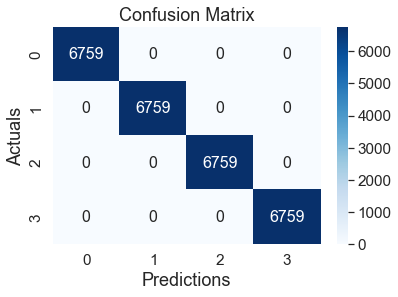

In [159]:
y_pred = model.predict(X_test) #making predictions with the model

#generating the confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sn

labels = np.unique(y_test)

conf_matrix = confusion_matrix(y_test, y_pred)

sn.set(font_scale=1.4) # for label size

sn.heatmap(conf_matrix, annot=True, fmt='g',annot_kws={"size": 16},cmap='Blues') # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

plt.show()

The random oversampling method is perfect because we are creating exact copies of the minority data. So, of course, the model is going to predict perfectly because I already knows the answer beforehand. It is like getting the same question on a test that you practiced.

To make this a little more sophisticated, we can employ selective random oversampling. In this, I divide the data into training and testing samples before oversampling. Then, I oversample the training data and fit my model to it. Finally, I apply the model to the testing dataset. This way, the model doesn't know beforehand what questions are on the test and we get a more realistic prediction.

In [268]:
X2 = df_pul.drop(df_pul.iloc[:,0:51],axis=1)
X2 = X2.drop(["Class","dmdt"],axis=1)
Y2 = df_pul['Class']

In [270]:
X_train = X2.iloc[0:int(len(X2)*0.8)] # taking the first 80% of the data as training
X_train.shape

(30567, 41)

In [271]:
X_test = X2.iloc[-1*int(len(X2)*0.2):] # the last 20% as testing.
X_test.shape

(7641, 41)

In [272]:
y_train = Y2.iloc[0:int(len(Y2)*0.8)]
y_test = Y2.iloc[-1*int(len(Y2)*0.2):]

In [259]:
df_main = pd.concat([X_train,y_train],axis=1)
df_main['Class'].value_counts()

0.0    26152
3.0     4096
2.0      287
4.0       28
1.0        4
Name: Class, dtype: int64

In [260]:
df_Scu = df_main[df_main['Class'] == 1]
df_Ceph = df_main[df_main['Class'] == 2]
df_rr = df_main[df_main['Class'] == 3]
df_lpv = df_main[df_main['Class'] == 4]
df_np = df_main[df_main['Class'] == 0]

In [261]:
count_0,count_1,count_2,count_3,count_4 = y_train.value_counts()

In [262]:
df_Scu_over = df_Scu.sample(count_0, replace=True)
df_Ceph_over = df_Ceph.sample(count_0, replace=True)
df_rr_over = df_rr.sample(count_0, replace=True)
df_lpv_over = df_lpv.sample(count_0, replace=True)

In [277]:
df_test = pd.concat([df_Scu_over,df_Ceph_over,df_rr_over,df_lpv_over],axis=0)
Y = df_test['Class']
X = df_test.drop('Class',axis=1)
X.shape, Y.value_counts()

((104608, 41),
 1.0    26152
 2.0    26152
 3.0    26152
 4.0    26152
 Name: Class, dtype: int64)

In [274]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.2,random_state=15,stratify=Y)

In [283]:
%%time
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train,y_train)

print(model.score(X_test, y_test)) # how well my model did!
print(model.score(X_train,y_train)) # to check if my model is overfitting.

0.9787985865724381
1.0
CPU times: user 12.1 s, sys: 22.4 ms, total: 12.1 s
Wall time: 12.1 s


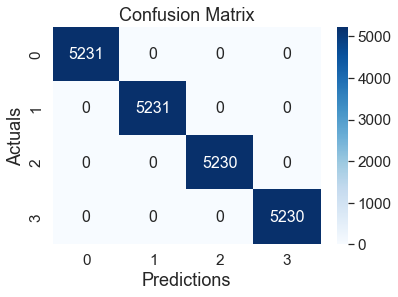

In [279]:
y_pred = model.predict(X2_test) #making predictions with the model

#generating the confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sn

labels = np.unique(y_test)

conf_matrix = confusion_matrix(y2_test, y_pred)

sn.set(font_scale=1.4) # for label size

sn.heatmap(conf_matrix, annot=True, fmt='g',annot_kws={"size": 16},cmap='Blues') # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

plt.show()

In [281]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mean_squared_error(y2_test, y_pred))
r2 = r2_score(y2_test, y_pred)
print('MAE (Mean-Absolute-Error): %s' %mae)
print('MSE (Mean-Squared-Error): %s' %mse)
print('RMSE (Root-MSE): %s' %rmse)
print('R2 score: %s' %r2)

from sklearn.metrics import classification_report
print(classification_report(y2_test, y_pred))

MAE (Mean-Absolute-Error): 0.0
MSE (Mean-Squared-Error): 0.0
RMSE (Root-MSE): 0.0
R2 score: 1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      5231
         2.0       1.00      1.00      1.00      5231
         3.0       1.00      1.00      1.00      5230
         4.0       1.00      1.00      1.00      5230

    accuracy                           1.00     20922
   macro avg       1.00      1.00      1.00     20922
weighted avg       1.00      1.00      1.00     20922



## SMOTE

SMOTE is another module in Python tailored to deal with data imbalance. However, it is slightly more sophisticated than random oversampling. This method generates fake data points that best mimic the minority class based on the k-nearest neighbors. So, the method not blindly copying the minority dataset but is generating fake points that mimic the minority.

In [9]:
delta_s = catalog[catalog["Delta Scu"] != 0]
delta_s["Class"] = delta_s["Delta Scu"].map({1:1})
cp = catalog[catalog["Cepheid"] != 0]
cp["Class"] = cp["Cepheid"].map({1:2})
rr =catalog[catalog["RR Lyrae"] != 0]
rr["Class"] = rr["RR Lyrae"].map({1:3})
lvp = catalog[catalog["LPV"] != 0]
lvp["Class"]= lvp["LPV"].map({1:4})
catalog['Class'] = catalog[catalog["pulsator"] != 1]["pulsator"]
df_pul = delta_s.append(cp, ignore_index = True)
df_pul = df_pul.append(rr, ignore_index = True)
df_pul = df_pul.append(lvp, ignore_index = True)
df_pul = df_pul.append(catalog[catalog["pulsator"] != 1], ignore_index = True) 

In [10]:
df_pul.shape

(38209, 94)

In [11]:
target = df_pul['Class']

In [12]:
df_pul = df_pul.drop(df_pul.iloc[:,0:51],axis=1)

In [13]:
df_pul = df_pul.drop(['dmdt','Class'],axis=1)

In [14]:
df_pul.shape

(38209, 41)

In [15]:
target.shape

(38209,)

In [24]:
from imblearn.over_sampling import SMOTE
# calling smote and using 3 nearest neighbors
smote = SMOTE(sampling_strategy='minority',k_neighbors=3)

# Since n class imbalances, we need to use the SMOTE method n-1 times.
# Here there are 5 class imbalances, so we implement the method 4 times.

x_sm, target_sm = smote.fit_resample(df_pul,target)
x2_sm, target2_sm = smote.fit_resample(x_sm,target_sm)
x3_sm, target3_sm = smote.fit_resample(x2_sm,target2_sm)
x4_sm, target4_sm = smote.fit_resample(x3_sm,target3_sm)




In [26]:
target4_sm.value_counts() #checking to see if the fake datapoints were produced.

1.0    33794
2.0    33794
3.0    33794
4.0    33794
0.0    33794
Name: Class, dtype: int64

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

RandForest = RandomForestRegressor() # this is an estimator. You can use a different one.

rfe = RFE(estimator=RandForest, step=1, verbose=1)

# step: # of unnecessary features to eliminate at a time. You can change this to any integer value
# verbose: tell me what is happening (1) or don't tell me (0)
# n_features_to_select: the number of features I want. This is totally subjective and can change.

In [ ]:
# when using the notebook first time, this step is required for unnecessary feature elimination.
# WARNING: takes a lot of time! See next cell for a quicker solution...

rfe.fit(x4_sm,target4_sm)
rfe.transform(x4_sm)

print("Optimal number of features: {}".format(rfe.n_features_))



In [69]:
# Using the notebook again, you don't need to run RFE everytime. So, I just defined the optimized_features
# dataframe with the optimized features.

# CODE:
#optimized_features = x4_sm[['period','n','wmean','roms','median_abs_dev','iqr','f70','f80','skew','stetson_j','stetson_k','ad','f1_power','f1_bic','f1_amp','f1_relamp1','f1_relphi1','f1_relphi2','n_ztf_alerts','mean_ztf_alert_braai']].copy()
                          

In [26]:
f = rfe.get_support(1) # show the optimuzed columns' indices
optimized_features = x4_sm[x4_sm.columns[f]] # creating an optimized dataframe.
optimized_features

In [71]:
#normalizing the input data

from sklearn.preprocessing import normalize

optimized_features_norm = normalize(optimized_features) # creates a normalized array

In [73]:
optimized_features_norm = pd.DataFrame(optimized_features_norm,columns=optimized_features.columns)
# converting the array to a pd DataFrame

In [74]:
optimized_features_norm.head() # checking for normalization

,period,n,wmean,roms,median_abs_dev,iqr,f70,f80,skew,stetson_j,stetson_k,ad,f1_power,f1_bic,f1_amp,f1_relamp1,f1_relphi1,f1_relphi2,n_ztf_alerts,mean_ztf_alert_braai
0,0.000213,0.200265,0.054128,0.016719,0.000329,0.000897,0.001242,0.001417,-0.648042,0.242164,0.002570,0.007591,0.002858,0.641459,0.000815,0.001194,0.001070,0.002007,0.257917,0.003032
1,0.000299,0.196128,0.049247,0.021046,0.000422,0.000896,0.001105,0.001447,-0.872826,0.093343,0.002520,0.004752,0.002917,0.348185,0.000727,0.000940,0.001018,0.001806,0.258532,0.002873
2,0.000353,0.484554,0.080923,0.017055,0.000396,0.000862,0.001316,0.001436,-0.165578,-0.351224,0.003928,0.018227,0.004220,0.697820,0.000693,0.001826,0.001557,0.003400,0.346745,0.004438
3,0.000456,0.534762,0.110235,0.014429,0.000707,0.001587,0.002447,0.002928,-0.082758,-0.048849,0.004841,0.009636,0.005106,0.700763,0.001375,0.002468,0.001961,0.000196,0.448510,0.005741
4,0.001448,0.019902,0.004727,0.005170,0.000082,0.000168,0.000275,0.000298,-0.995719,-0.031350,0.000259,0.000263,0.000304,0.068437,0.000129,0.000149,0.000134,0.000277,0.049296,0.000264


### Training dataset

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(optimized_features_norm, target4_sm, test_size=0.20,random_state=2,stratify=target4_sm)

In [79]:
y_train.value_counts()

2.0    27036
3.0    27035
1.0    27035
0.0    27035
4.0    27035
Name: Class, dtype: int64

### Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

model_rf.score(X_test, y_test) # how well my model did!

0.9934899686334853

In [81]:
y_pred_rf = model_rf.predict(X_test) #making predictions with the model

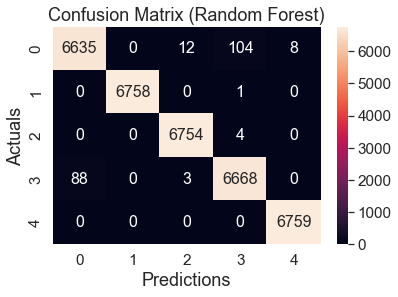

In [82]:
#generating the confusion matrix:

from sklearn.metrics import confusion_matrix
import seaborn as sn


conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

sn.set(font_scale=1.4) # for label size

sn.heatmap(conf_matrix_rf, annot=True, fmt='g',annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Random Forest)', fontsize=18)

plt.show()

In [83]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)
print('MAE (Mean-Absolute-Error): %s' %mae)
print('MSE (Mean-Squared-Error): %s' %mse)
print('RMSE (Root-MSE): %s' %rmse)
print('R2 score: %s' %r2)

from sklearn.metrics import classification_report
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
CR_rf = pd.DataFrame(report_rf).transpose()

MAE (Mean-Absolute-Error): 0.01896786411789075
MSE (Mean-Squared-Error): 0.05666686394034444
RMSE (Root-MSE): 0.23804802864200417
R2 score: 0.9716674064210682


In [84]:
CR_rf

,precision,recall,f1-score,support
0.0,0.986911,0.981654,0.984275,6759.00000
1.0,1.000000,0.999852,0.999926,6759.00000
2.0,0.997784,0.999408,0.998595,6758.00000
3.0,0.983916,0.986536,0.985225,6759.00000
4.0,0.998818,1.000000,0.999409,6759.00000
accuracy,0.993490,0.993490,0.993490,0.99349
macro avg,0.993486,0.993490,0.993486,33794.00000
weighted avg,0.993486,0.993490,0.993486,33794.00000


### K-Nearest Neighbors

In [85]:
from sklearn.neighbors import KNeighborsClassifier

model_knc = KNeighborsClassifier()

model_knc.fit(X_train, y_train)

model_knc.score(X_test, y_test) # how well my model did!

0.9298987986033024

In [86]:
y_pred_knc = model_knc.predict(X_test) #making predictions with the model

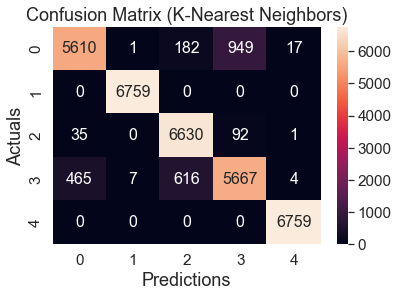

In [87]:
#generating the confusion matrix:

from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_matrix_knc = confusion_matrix(y_test, y_pred_knc)

sn.set(font_scale=1.4) # for label size

sn.heatmap(conf_matrix_knc, annot=True, fmt='g',annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (K-Nearest Neighbors)', fontsize=18)

plt.show()

In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred_knc)
mse = mean_squared_error(y_test, y_pred_knc)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knc))
r2 = r2_score(y_test, y_pred_knc)
print('MAE (Mean-Absolute-Error): %s' %mae)
print('MSE (Mean-Squared-Error): %s' %mse)
print('RMSE (Root-MSE): %s' %rmse)
print('R2 score: %s' %r2)

from sklearn.metrics import classification_report
report_knc = classification_report(y_test, y_pred_knc, output_dict=True)
CR_knc = pd.DataFrame(report_knc).transpose()

MAE (Mean-Absolute-Error): 0.1619518257678878
MSE (Mean-Squared-Error): 0.4323548558915784
RMSE (Root-MSE): 0.6575369616162869
R2 score: 0.7838289687823643


### Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

gnb.score(X_test, y_test) # how well my model did!

0.604545185535894

In [90]:
y_pred_gnb = gnb.predict(X_test) #making predictions with the model

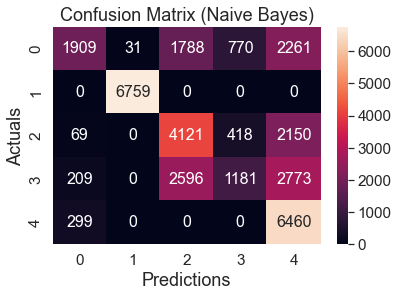

In [91]:
#generating the confusion matrix:

from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

sn.set(font_scale=1.4) # for label size

sn.heatmap(conf_matrix_gnb, annot=True, fmt='g',annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Naive Bayes)', fontsize=18)

plt.show()

In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred_gnb)
mse = mean_squared_error(y_test, y_pred_gnb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gnb))
r2 = r2_score(y_test, y_pred_gnb)
print('MAE (Mean-Absolute-Error): %s' %mae)
print('MSE (Mean-Squared-Error): %s' %mse)
print('RMSE (Root-MSE): %s' %rmse)
print('R2 score: %s' %r2)

from sklearn.metrics import classification_report
report_gnb = classification_report(y_test, y_pred_gnb, output_dict=True)
CR_gnb = pd.DataFrame(report_gnb).transpose()

MAE (Mean-Absolute-Error): 0.7992247144463515
MSE (Mean-Squared-Error): 2.1192223471622182
RMSE (Root-MSE): 1.4557549062813486
R2 score: -0.05957981949992597


### Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=0).fit(X_train, y_train)

model_lr.score(X_test, y_test) 

0.7535065396224182

In [94]:
y_pred_lr = model_lr.predict(X_test)

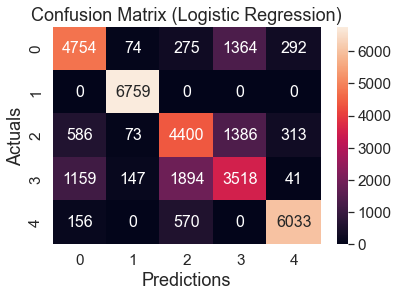

In [95]:
#generating the confusion matrix:

from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

sn.set(font_scale=1.4) # for label size

sn.heatmap(conf_matrix_lr, annot=True, fmt='g',annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Logistic Regression)', fontsize=18)

plt.show()

In [96]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)
print('MAE (Mean-Absolute-Error): %s' %mae)
print('MSE (Mean-Squared-Error): %s' %mse)
print('RMSE (Root-MSE): %s' %rmse)
print('R2 score: %s' %r2)

from sklearn.metrics import classification_report
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
CR_lr = pd.DataFrame(report_lr).transpose()


MAE (Mean-Absolute-Error): 0.4915369592235308
MSE (Mean-Squared-Error): 1.2104811505000888
RMSE (Root-MSE): 1.1002186830353722
R2 score: 0.3947773339251368


In [97]:
CR_lr

,precision,recall,f1-score,support
0.0,0.714350,0.703358,0.708812,6759.000000
1.0,0.958316,1.000000,0.978714,6759.000000
2.0,0.616333,0.651080,0.633230,6758.000000
3.0,0.561264,0.520491,0.540109,6759.000000
4.0,0.903279,0.892588,0.897901,6759.000000
accuracy,0.753507,0.753507,0.753507,0.753507
macro avg,0.750708,0.753504,0.751753,33794.000000
weighted avg,0.750712,0.753507,0.751757,33794.000000


### Support Vector Mechanics (SVM)

In [98]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
model_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))

model_svm.fit(X_train, y_train)

model_svm.score(X_test, y_test) 

0.9486003432561994

In [99]:
y_pred_svm = model_svm.predict(X_test)

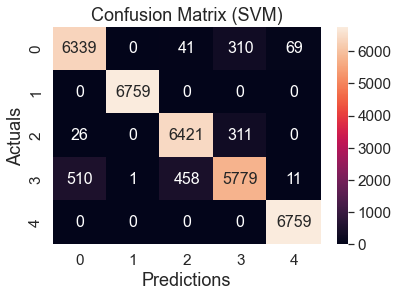

In [100]:
#generating the confusion matrix:

from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

sn.set(font_scale=1.4) # for label size

sn.heatmap(conf_matrix_svm, annot=True, fmt='g',annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (SVM)', fontsize=18)

plt.show()

In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred_svm)
mse = mean_squared_error(y_test, y_pred_svm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2 = r2_score(y_test, y_pred_svm)
print('MAE (Mean-Absolute-Error): %s' %mae)
print('MSE (Mean-Squared-Error): %s' %mse)
print('RMSE (Root-MSE): %s' %rmse)
print('R2 score: %s' %r2)

from sklearn.metrics import classification_report
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
CR_svm = pd.DataFrame(report_svm).transpose()


MAE (Mean-Absolute-Error): 0.10806652068414511
MSE (Mean-Squared-Error): 0.2821802686867491
RMSE (Root-MSE): 0.5312064275653572
R2 score: 0.8589140405385411


### Gradient Boosting Classifier

NOTE: This takes a lot of time to run. Please run at your own risk

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0,criterion='mse')

model_gbc.fit(X_train,y_train)

model_gbc.score(X_test, y_test)

In [ ]:
y_pred_gbc = model_gbc.predict(X_test)

In [ ]:
#generating the confusion matrix:

from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

sn.set(font_scale=1.4) # for label size

sn.heatmap(conf_matrix_gbc, annot=True, fmt='g',annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (K-Nearest Neighbors)', fontsize=18)

plt.show()

In [142]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred_gbc)
mse = mean_squared_error(y_test, y_pred_gbc)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbc))
r2 = r2_score(y_test, y_pred_gbc)
print('MAE (Mean-Absolute-Error): %s' %mae)
print('MSE (Mean-Squared-Error): %s' %mse)
print('RMSE (Root-MSE): %s' %rmse)
print('R2 score: %s' %r2)

from sklearn.metrics import classification_report
report_gbc = classification_report(y_test, y_pred_gbc, output_dict=True)
CR_gbc = pd.DataFrame(report_gbc).transpose()


MAE (Mean-Absolute-Error): 0.05527777777777778
MSE (Mean-Squared-Error): 0.16
RMSE (Root-MSE): 0.4
R2 score: 0.725210495869759


## Putting it all together:

In [102]:
labels = ('Non-pulsators','Delta Scu','Cepheids','RR Lyrae','LPV')
color = 'viridis'

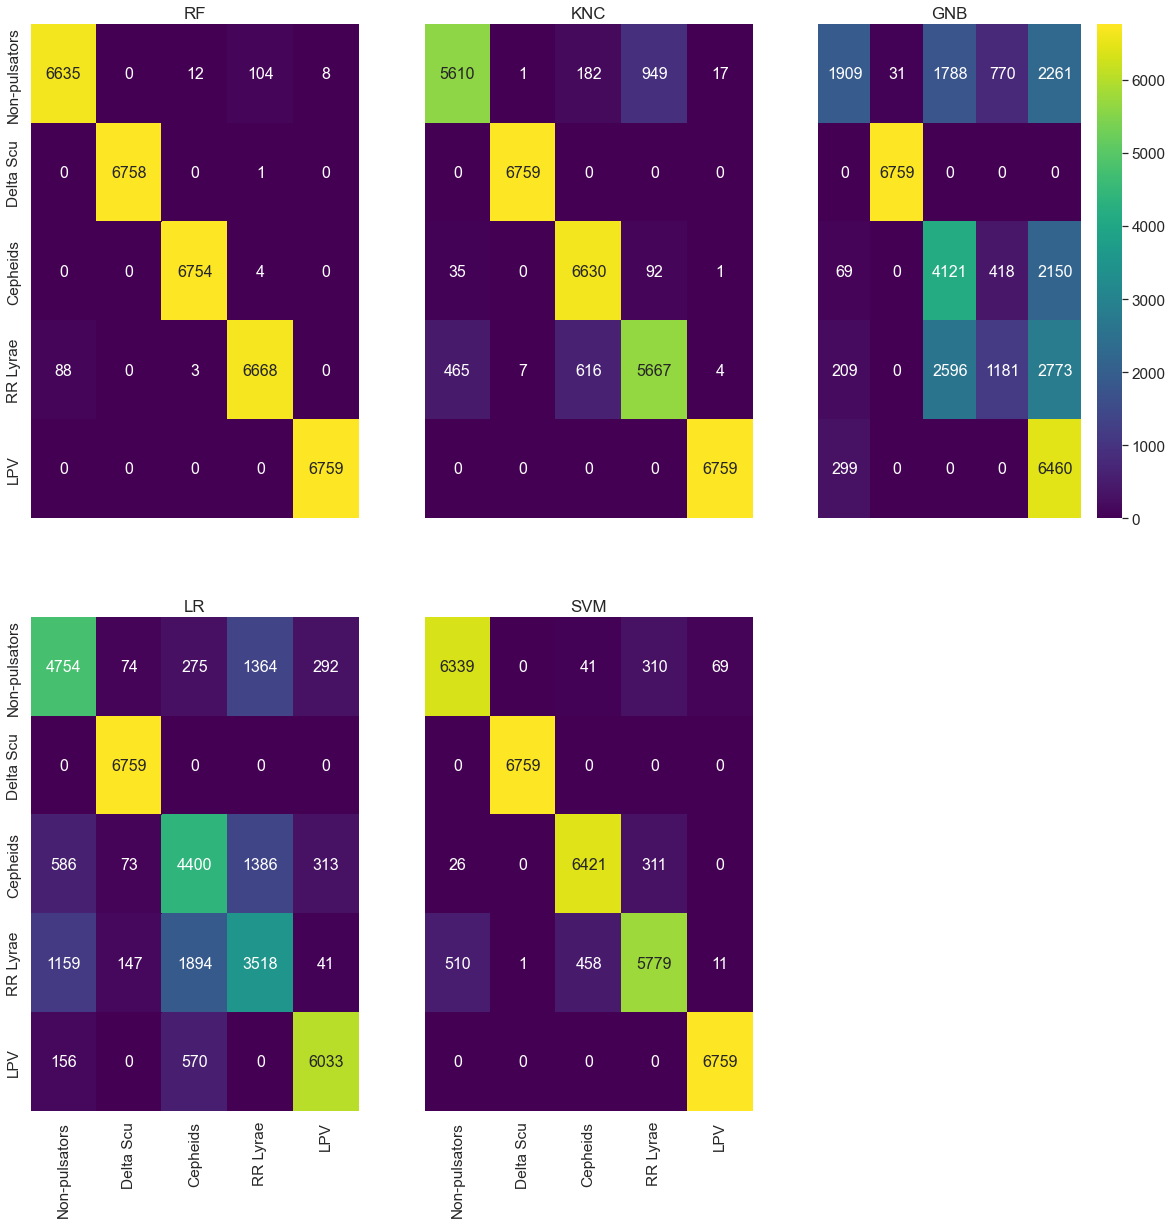

In [103]:
import seaborn as sn

sn.set(font_scale=1.4) # for label size

fig, axs = plt.subplots(2,3,figsize=(20,20),sharex=True,sharey=True)

sn.heatmap(conf_matrix_rf, annot=True, fmt='g',annot_kws={"size": 16},ax=axs[0,0],cbar=False,cmap=color) # font size
axs[0,0].set_title("RF")

sn.heatmap(conf_matrix_knc, annot=True, fmt='g',annot_kws={"size": 16},ax=axs[0,1],cbar=False,cmap=color) # font size
axs[0,1].set_title("KNC")

sn.heatmap(conf_matrix_gnb, annot=True, fmt='g',annot_kws={"size": 16},ax=axs[0,2],cbar=True,cmap=color) # font size
axs[0,2].set_title("GNB")

sn.heatmap(conf_matrix_lr, annot=True, fmt='g',annot_kws={"size": 16},ax=axs[1,0],cbar=False,cmap=color) # font size
axs[1,0].set_title("LR")


sn.heatmap(conf_matrix_svm, annot=True, fmt='g',annot_kws={"size": 16},ax=axs[1,1],cbar=False,cmap=color) # font size
axs[1,1].set_title("SVM")


#sn.heatmap(conf_matrix_gbc, annot=True, fmt='g',annot_kws={"size": 16},ax=axs[1,2],cbar=True,cmap=color) # font size
#axs[1,2].set_title("GBC")
fig.delaxes(axs[1,2])

axs[1,0].set_xticklabels(labels,rotation=90)
axs[1,1].set_xticklabels(labels,rotation=90)
#axs[1,2].set_xticklabels(labels,rotation=90)

axs[0,0].set_yticklabels(labels)
axs[0,1].set_yticklabels(labels)
axs[0,2].set_yticklabels(labels)


#fig.colorbar(sp,ax=axs[:,3], cax=axs[:,3])
#plt.xlabel('Predictions', fontsize=18)
#plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix (K-Nearest Neighbors)', fontsize=18)

plt.show()

## Cross validation and comparing performances:

I have not run this after making changes. To produce the plot please re-run it.

In [162]:
k_fold = StratifiedKFold(n_splits=10)
cv_lr = cross_val_score(LogisticRegression(),X_train,y_train,cv=k_fold,scoring='accuracy')
cv_rf = cross_val_score(RandomForestClassifier(),X_train,y_train,cv=k_fold,scoring='accuracy')
cv_knc = cross_val_score(KNeighborsClassifier(),X_train,y_train,cv=k_fold,scoring='accuracy')
cv_gnb = cross_val_score(GaussianNB(),X_train,y_train,cv=k_fold,scoring='accuracy')
cv_svm = cross_val_score(SVC(),X_train,y_train,cv=k_fold,scoring='accuracy')
#cv_gbc = cross_val_score(GradientBoostingClassifier(),X_train,y_train,cv=k_fold,scoring='accuracy')

In [178]:
folds = np.linspace(1,10,10)

In [205]:
cv_lr

array([0.69305556, 0.68132716, 0.66527778, 0.69598765, 0.66759259,
       0.69027778, 0.68595679, 0.69089506, 0.6787037 , 0.67031949])

In [206]:
cv_rf

array([0.98533951, 0.98595679, 0.98395062, 0.98410494, 0.98472222,
       0.98518519, 0.98395062, 0.98626543, 0.98441358, 0.98734373])

In [207]:
cv_knc

array([0.95447531, 0.95617284, 0.9537037 , 0.95200617, 0.95262346,
       0.9537037 , 0.95185185, 0.95416667, 0.95277778, 0.95400525])

In [208]:
cv_gnb

array([0.56003086, 0.55941358, 0.56311728, 0.5587963 , 0.55462963,
       0.55987654, 0.56111111, 0.55895062, 0.56296296, 0.55888254])

In [209]:
cv_svm

array([0.69984568, 0.59938272, 0.60555556, 0.60925926, 0.60478395,
       0.60771605, 0.61064815, 0.60246914, 0.60540123, 0.6031795 ])

In [210]:
#cv_gbc

array([0.98271605, 0.98472222, 0.98117284, 0.9816358 , 0.9837963 ,
       0.98395062, 0.98364198, 0.98580247, 0.98256173, 0.98595462])

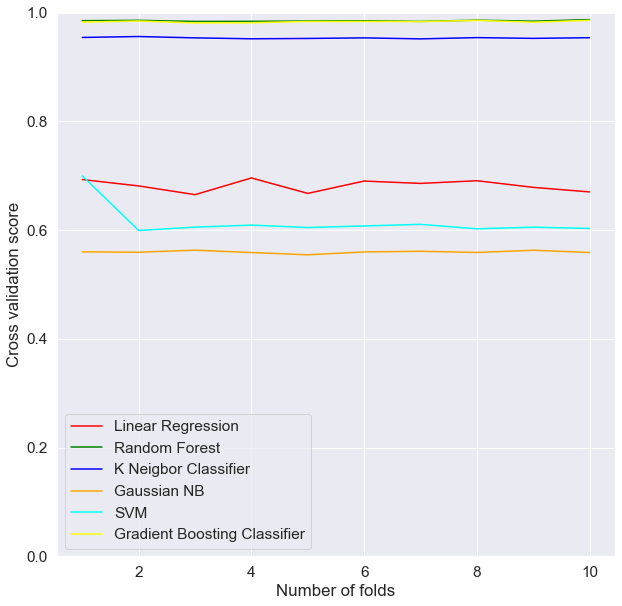

In [204]:
import matplotlib.pyplot as plt

fig = plt.subplots(1,1,figsize=(10, 10))

plt.plot(folds, cv_lr,color='red',label= "Linear Regression")
plt.plot(folds, cv_rf,color='green',label= "Random Forest")
plt.plot(folds, cv_knc,color='blue',label= "K Neigbor Classifier")
plt.plot(folds, cv_gnb,color='orange',label= "Gaussian NB")
plt.plot(folds, cv_svm,color='cyan',label= "SVM")
plt.plot(folds, cv_gbc,color='yellow',label= "Gradient Boosting Classifier")

plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel("Number of folds")
plt.ylabel("Cross validation score")
plt.show()

## Implementing Unsupervised Learning Technique:

I tried to classify using TSNE, an unsupervised machine learning technique in Python.

TSNE is a non-linear feature elimination method that comes under unsupervised ML. It is very powerful because it can find non-linear relations between features in a dataset and pick the most important features to classify the data.

WARNING: This takes a lot of time!

In [104]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123,perplexity=50)
z = tsne.fit_transform(optimized_features_norm) 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 168970 samples in 0.001s...
[t-SNE] Computed neighbors for 168970 samples in 417.542s...
[t-SNE] Computed conditional probabilities for sample 1000 / 168970
[t-SNE] Computed conditional probabilities for sample 2000 / 168970
[t-SNE] Computed conditional probabilities for sample 3000 / 168970
[t-SNE] Computed conditional probabilities for sample 4000 / 168970
[t-SNE] Computed conditional probabilities for sample 5000 / 168970
[t-SNE] Computed conditional probabilities for sample 6000 / 168970
[t-SNE] Computed conditional probabilities for sample 7000 / 168970
[t-SNE] Computed conditional probabilities for sample 8000 / 168970
[t-SNE] Computed conditional probabilities for sample 9000 / 168970
[t-SNE] Computed conditional probabilities for sample 10000 / 168970
[t-SNE] Computed conditional probabilities for sample 11000 / 168970
[t-SNE] Computed conditional probabilities for sample 12000 / 168970
[t-SNE] Computed conditional prob

[t-SNE] Computed conditional probabilities for sample 127000 / 168970
[t-SNE] Computed conditional probabilities for sample 128000 / 168970
[t-SNE] Computed conditional probabilities for sample 129000 / 168970
[t-SNE] Computed conditional probabilities for sample 130000 / 168970
[t-SNE] Computed conditional probabilities for sample 131000 / 168970
[t-SNE] Computed conditional probabilities for sample 132000 / 168970
[t-SNE] Computed conditional probabilities for sample 133000 / 168970
[t-SNE] Computed conditional probabilities for sample 134000 / 168970
[t-SNE] Computed conditional probabilities for sample 135000 / 168970
[t-SNE] Computed conditional probabilities for sample 136000 / 168970
[t-SNE] Computed conditional probabilities for sample 137000 / 168970
[t-SNE] Computed conditional probabilities for sample 138000 / 168970
[t-SNE] Computed conditional probabilities for sample 139000 / 168970
[t-SNE] Computed conditional probabilities for sample 140000 / 168970
[t-SNE] Computed con

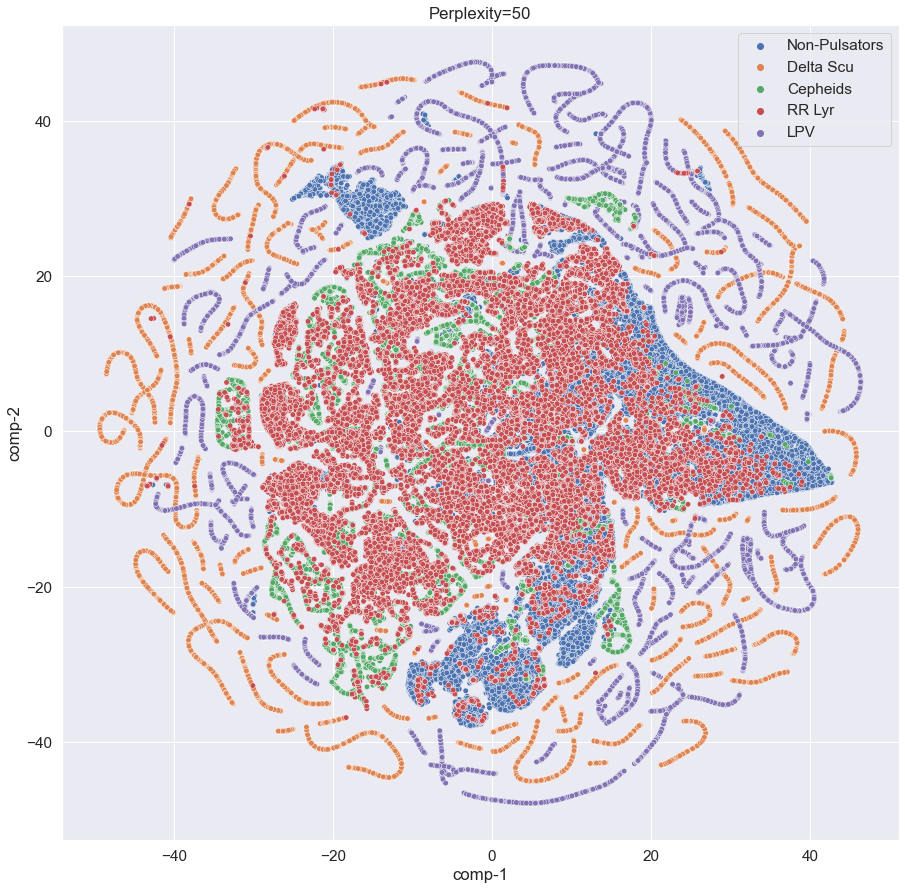

In [105]:
#from sklearn.manifold import TSNE

#tsne = TSNE(n_components=2, verbose=1, random_state=123,perplexity=200)
#z = tsne.fit_transform(X2) 

import seaborn as sn

df = pd.DataFrame()
df["y"] = target4_sm
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

fig,ax = plt.subplots(1,1,figsize=(15,15))

sn.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sn.color_palette(n_colors=5),s=30,
                data=df).set(title="Perplexity=50") 

handles, labels  =  ax.get_legend_handles_labels()

ax.legend(handles, ['Non-Pulsators','Delta Scu', 'Cepheids','RR Lyr','LPV'], loc='best')

plt.show()